## Stochastic Simulation for Solving Knight's Tour Problem

* This notebook demonstrates a Monte Carlo search method to generate a path for a knight on a chessboard, given a starting position and board size. The class is specifically designed to simulate the knight's legal moves across the chessboard to explore different positions without revisiting the same spot.
* The goal is to visit all the available positions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

from simulation_code import *

In [2]:
%psource mc_search

class mc_search:
    def __init__(self, board_size, start):
        """
        Initializes the Monte Carlo search for a knight's tour.
        
        Parameters:
        - board_size (int): The size of the chessboard (N x N).
        - start (tuple): The starting position of the knight on the board as a tuple (x, y).
        """
        self.board_size = board_size
        self.curr = np.array(start)
        self.path = [tuple(self.curr)]
        # Defines all possible moves of a knight
        self.knight_moves = np.array([[-2, -1], [-2, 1], [-1, -2], [-1, 2], [1, -2], [1, 2], [2, -1], [2, 1]])

    def reset(self, start):
        """
        Reinitializes the Monte Carlo search for a knight's tour for the next iteration.
        Parameters:
        - start (tuple): The starting position of the knight on the board as a tuple (x, y).
        """
        self.curr = np.array(start)
        self.path = [tuple(self.curr)]
        
    def valid_positions(self, curr):
        """
      

In [3]:
board_size = 8
inital_point = [3,3]

In [37]:
sample1 = mc_search(board_size, inital_point)
print("Monte Carlo Search initialized. Starting location:", sample1.curr, "Board Size: ", sample1.board_size, "x", sample1.board_size)

Monte Carlo Search initialized. Starting location: [3 3] Board Size:  8 x 8


#### It usually takes a lot (~1e6) simulations to get the solution for the Knight's tour.

In [53]:
start_time = time.time()
complete_path_length = board_size * board_size
total_time = 0
counter = 0
length_dist = np.zeros(complete_path_length)

In [54]:
sample1.run(complete_path_length)

while len(sample1.path) < (complete_path_length):
    length_dist[len(sample1.path)] += 1
    sample1.reset(inital_point)
    sample1.run(complete_path_length)
    counter += 1
    if counter % 10000 == 0:
        current_time = time.time()
        elapsed_time = current_time - start_time
        total_time += elapsed_time
        print(f"Simulation Number: {counter}, Time elapsed: {elapsed_time:.2f} seconds, Total time: {total_time:.2f} seconds")
        start_time = time.time()

Simulation Number: 10000, Time elapsed: 5.39 seconds, Total time: 5.39 seconds
Simulation Number: 20000, Time elapsed: 4.96 seconds, Total time: 10.35 seconds
Simulation Number: 30000, Time elapsed: 4.93 seconds, Total time: 15.28 seconds
Simulation Number: 40000, Time elapsed: 4.95 seconds, Total time: 20.23 seconds
Simulation Number: 50000, Time elapsed: 4.89 seconds, Total time: 25.12 seconds
Simulation Number: 60000, Time elapsed: 4.93 seconds, Total time: 30.05 seconds
Simulation Number: 70000, Time elapsed: 4.93 seconds, Total time: 34.99 seconds
Simulation Number: 80000, Time elapsed: 4.92 seconds, Total time: 39.91 seconds
Simulation Number: 90000, Time elapsed: 4.88 seconds, Total time: 44.79 seconds
Simulation Number: 100000, Time elapsed: 4.99 seconds, Total time: 49.78 seconds
Simulation Number: 110000, Time elapsed: 5.00 seconds, Total time: 54.78 seconds
Simulation Number: 120000, Time elapsed: 4.89 seconds, Total time: 59.67 seconds
Simulation Number: 130000, Time elapse

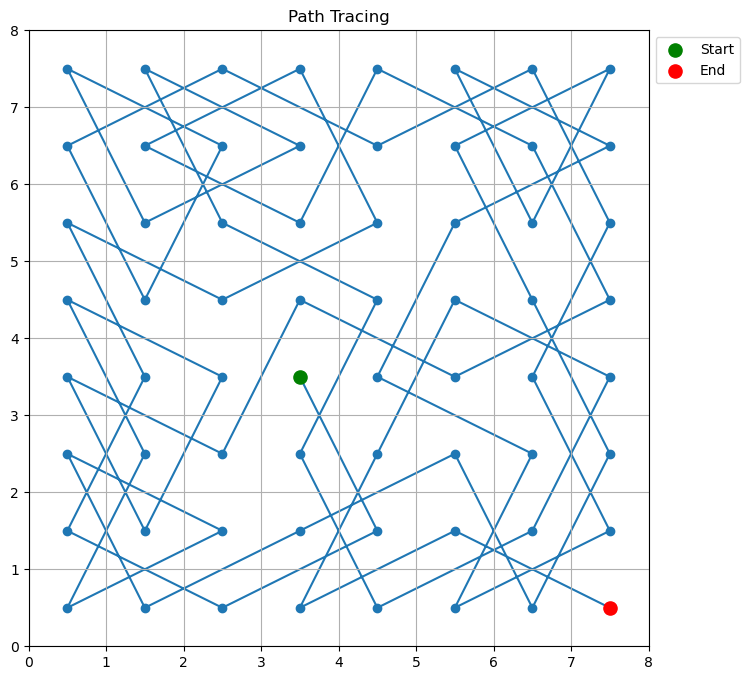

In [55]:
# Adjusting the given path to use the midpoint of the matrix as the reference for plotting points
mid_point = np.array([.5, .5])
adjusted_path = sample1.path + mid_point

plt.figure(figsize=(8, 8))
plt.xlim(0, board_size)
plt.ylim(0, board_size)

plt.plot(adjusted_path[:, 1], adjusted_path[:, 0], marker='o', zorder = -1)
plt.scatter(adjusted_path[0][1], adjusted_path[0][0], marker='o', color='green', label='Start', s= 90)
plt.scatter(adjusted_path[-1][1], adjusted_path[-1][0], marker='o', color='red', label='End', s= 90)

plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Path Tracing')

plt.show()

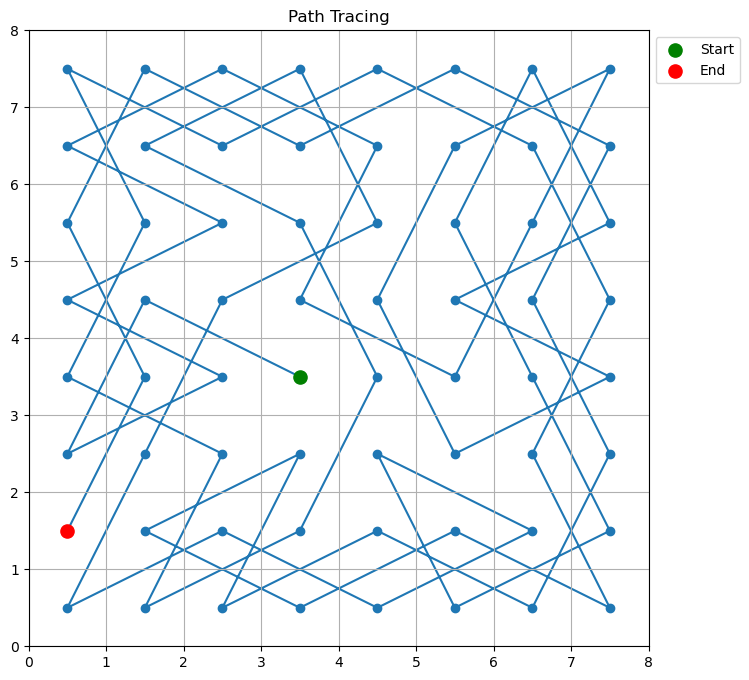

In [31]:
mid_point = np.array([.5, .5])
adjusted_path = sample1.path + mid_point

plt.figure(figsize=(8, 8))
plt.xlim(0, board_size)
plt.ylim(0, board_size)

plt.plot(adjusted_path[:, 1], adjusted_path[:, 0], marker='o', zorder = -1)
plt.scatter(adjusted_path[0][1], adjusted_path[0][0], marker='o', color='green', label='Start', s= 90)
plt.scatter(adjusted_path[-1][1], adjusted_path[-1][0], marker='o', color='red', label='End', s= 90)

plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Path Tracing')

plt.show()

### Using this simulation, you can do more statistical studies - one of them is seeing the distribution of path lengths of different simulations

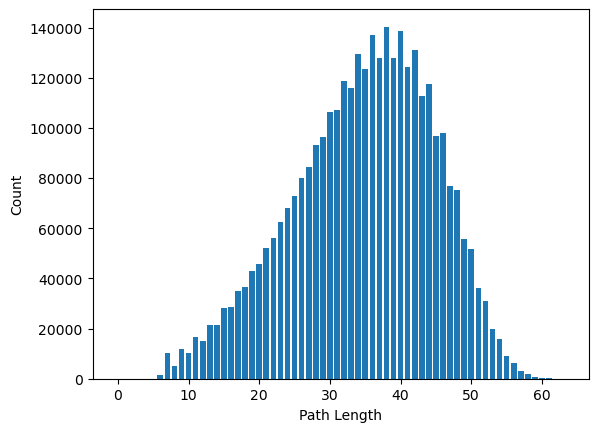

In [61]:
indices = range(len(length_dist))
values = length_dist

plt.bar(indices, values)
plt.xlabel("Path Length")
plt.ylabel("Count")
plt.show()